In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
column_names = [
    "Class",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280_OD315",
    "Proline",
]
df=pd.read_csv('wine.csv',names=column_names)

In [6]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# separating the columns in target and features

X=df.drop('Class',axis=1)
y=df['Class']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42)

In [27]:
# Checking for missing data:-
df.isnull().sum()

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

In [8]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# There is no missing data.

In [28]:
# Scaling the dataset:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
# Implementation of PCA:-

from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [38]:
# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

desired_variance_threshold = 0.95  # Adjust as needed
num_components_retained = np.argmax(cumulative_variance >= desired_variance_threshold) + 1

print(f"Number of components to retain: {num_components_retained}")

Number of components to retain: 10


# Therefore we need to retain 10 features.

In [45]:
pca=PCA(n_components=num_components_retained)
X_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

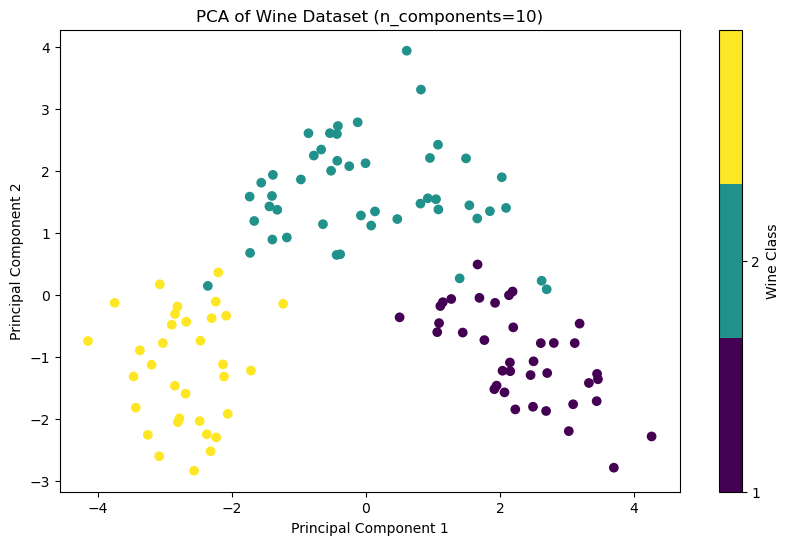

In [46]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap("viridis", 3))
plt.colorbar(ticks=[0, 1, 2], label="Wine Class")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset (n_components=10)")
plt.show()

# Although we have found that the number of components must be 10 but we can make the scatter plot in 2 or 3 dimensions only and hence here only 2 components are taken.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

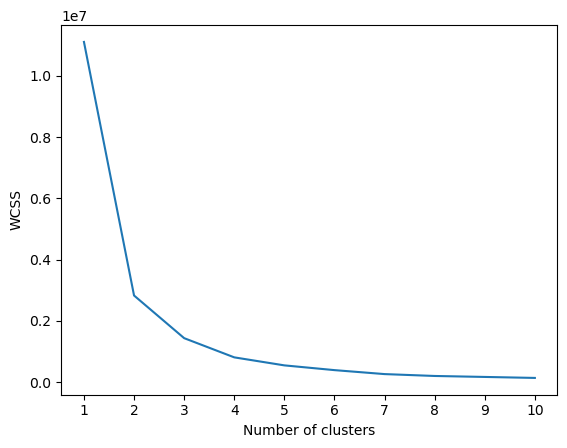

In [47]:
# performing clustering by k means clustering algorithm:-

from sklearn.cluster import KMeans
## Manual process
## Elbow method to select the K value

wcss=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    wcss.append(Kmeans.inertia_)
    
# Plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we can see that number of clusters are 3

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


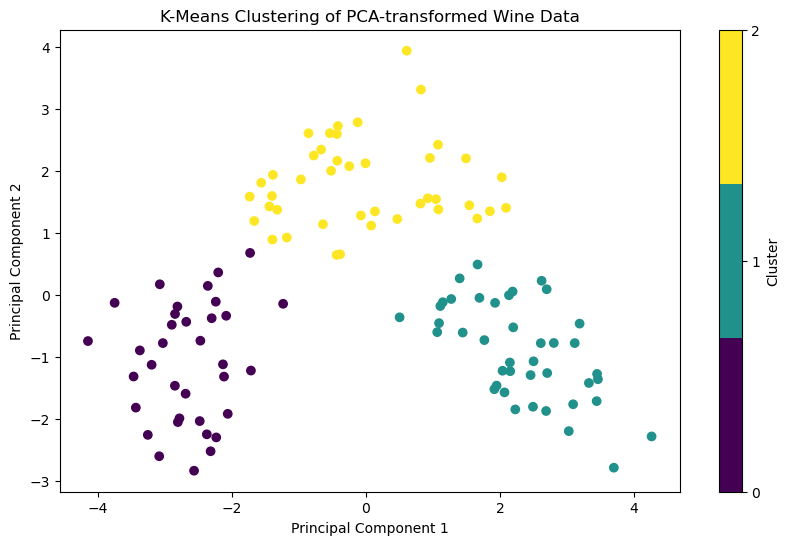

In [51]:
n_clusters = 3  # assumed that there are 3 clusters from the knee plot above
kmeans = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++')
clusters = kmeans.fit_predict(X_pca)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=plt.cm.get_cmap("viridis", n_clusters))
plt.colorbar(ticks=range(n_clusters), label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of PCA-transformed Wine Data")
plt.show()

In [50]:
y_test_labels=kmeans.predict(X_test_pca)

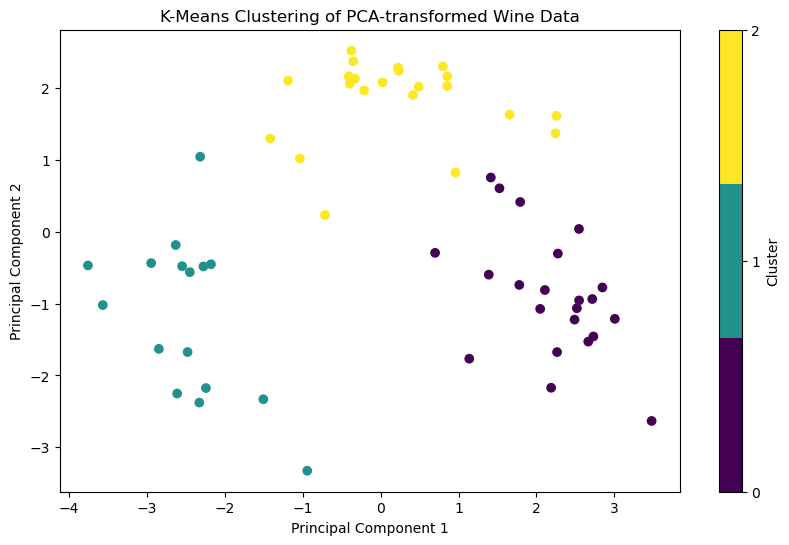

In [53]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_labels, cmap=plt.cm.get_cmap("viridis", n_clusters))
plt.colorbar(ticks=range(n_clusters), label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of PCA-transformed Wine Data")
plt.show()

# Report

# Here's an interpretation of the results:

# PCA Analysis:

# Dimensionality Reduction:
PCA was applied to reduce the high-dimensional feature space of the Wine dataset (originally with 13 features) to a lower-dimensional space while preserving the most important information. In this case, PCA was performed with n_components=10, which means the dataset was projected into a 10-dimensional subspace.

# Explained Variance: 
To determine the efficacy of dimensionality reduction, you can examine the explained variance ratio. It indicates the proportion of the total variance in the data that is captured by each principal component. You might find that the first few components explain the majority of the variance, while subsequent components explain less and less.

# Scatter Plot:
The scatter plot of the first two principal components visually represents the data in a 2D space. Points on the plot are color-coded based on their assigned clusters from the K-Means analysis. You can observe the distribution of data points in this reduced-dimensional space.

# K-Means Clustering Analysis:

# Number of Clusters:
K-Means clustering was applied with a specific number of clusters (n_clusters=3 in this case). The choice of the number of clusters can impact the results, and it should be guided by domain knowledge or other validation techniques.

# Cluster Assignment:
Each data point is assigned to one of the clusters based on its proximity to the cluster centroids. In the scatter plot, you can see the cluster assignments as different colors.

# Interpretation:

1) The PCA analysis aimed to reduce the dimensionality of the Wine dataset while retaining important information. The scatter plot of the first two principal components reveals how data points are distributed in this lower-dimensional space.

2) In the scatter plot, you can observe if there are natural clusters or groupings of data points. The colors represent the cluster assignments made by K-Means.

3) Interpretation of clusters depends on the specific context and goals of the analysis. For instance, in the case of the Wine dataset, if you have information about the true class labels, you can assess how well K-Means clustering aligns with those labels. If the clustering aligns well, it indicates that K-Means has discovered meaningful groupings in the data.

4) If you don't have access to true labels, you can use additional techniques (e.g., silhouette score, elbow method) to evaluate the quality of the clustering and determine if the chosen number of clusters is appropriate.

